<a href="https://colab.research.google.com/github/ananyataneja/Dominant-Color-Extraction/blob/main/Dominant_Color_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dominant Color Extraction from an Image

In [ ]:
!wget https://www.alleycat.org/wp-content/uploads/2019/03/FELV-cat.jpg -O "cat.jpg"
# -O "abc.jpg" to rename the file

--2023-08-08 07:17:21--  https://www.alleycat.org/wp-content/uploads/2019/03/FELV-cat.jpg
Resolving www.alleycat.org (www.alleycat.org)... 141.193.213.20, 141.193.213.21
Connecting to www.alleycat.org (www.alleycat.org)|141.193.213.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107329 (105K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>] 104.81K  --.-KB/s    in 0.008s  

2023-08-08 07:17:21 (12.7 MB/s) - ‘cat.jpg’ saved [107329/107329]



## Image analysis

In [ ]:
img = plt.imread("cat.jpg")

In [ ]:
img.shape #3 represents rbg channel (3 colors red blue green)each color in an image has a different rgb combination value

(463, 703, 3)

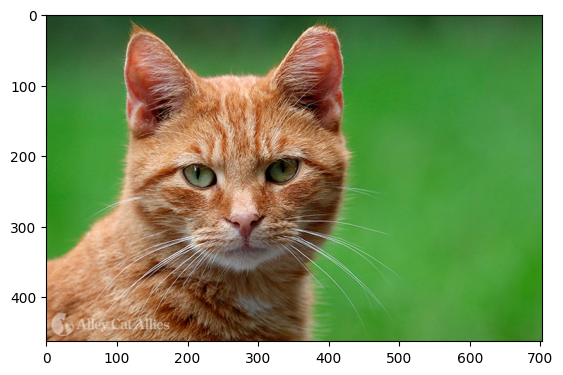

In [ ]:
plt.imshow(img) #use matplotlib

In [ ]:
n = img.shape[0]*img.shape[1] #len x breadth
n

325489

In [ ]:
# flattening an image
all_pixels = img.reshape((n, 3)) #n rows with rbg combination i.e 3 columns
all_pixels.shape

(325489, 3)

In [ ]:
all_pixels[:5]

array([[34, 69, 39],
       [32, 69, 38],
       [31, 68, 37],
       [32, 69, 38],
       [34, 69, 39]], dtype=uint8)

In [ ]:
# to extract one particular pixel
# the pink part of its right ear for eg
#it looks like its located at 400 x 70
#so skip all pixels of first 70 rows and add 400 to get the pixel of ear
all_pixels[70*703+400]

array([178,  82,  58], dtype=uint8)

In [ ]:
#now enter 178,  82,  58 in color picker in google and it will give a pinkish red color

## Extract dominant colors

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model  = KMeans(n_clusters = 3) #3 dominant colors will be the centre for the clusters
model.fit(all_pixels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
centers = model.cluster_centers_.astype('uint8')
centers

array([[193, 149, 117],
       [ 70, 148,  58],
       [ 88,  71,  41]], dtype=uint8)

## Regenrate our image using only top 3 colors.

In [ ]:
new_img = np.zeros((n, 3), dtype='uint8') # blank flattened image with zeroes

new_img.shape

(325489, 3)

In [ ]:
centers #dominant colors

array([[193, 149, 117],
       [ 70, 148,  58],
       [ 88,  71,  41]], dtype=uint8)

In [ ]:
model.labels_ # array of which cluster each pixel belongs to

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [ ]:
for i in range(n): #iteration for each pixel
    group_idx = model.labels_[i] #get group/cluster of 1st pixel for eg
    new_img[i] = centers[group_idx] #store the centre of its cluster in the newimage

In [ ]:
new_img.shape

(325489, 3)

In [ ]:
new_img = new_img.reshape(*img.shape) #reshape in the dimensions of the orignal image

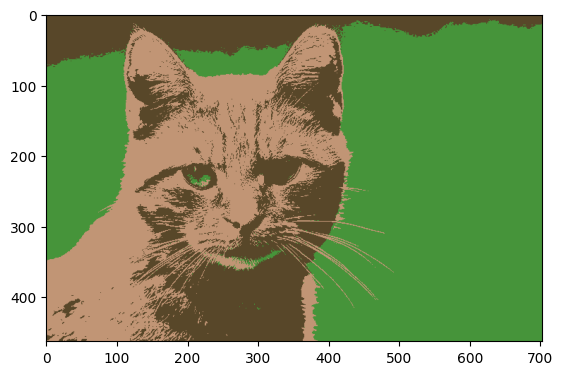

In [ ]:
plt.imshow(new_img) #using only 3 colors which were dominant
plt.show()

## Example 2

In [ ]:
!wget https://w0.peakpx.com/wallpaper/336/926/HD-wallpaper-green-tree-blue-sky-background-greenery-grass-nature.jpg -O 'trees.jpg'
# -O "abc.jpg" to rename the file

--2023-08-08 07:17:26--  https://w0.peakpx.com/wallpaper/336/926/HD-wallpaper-green-tree-blue-sky-background-greenery-grass-nature.jpg
Resolving w0.peakpx.com (w0.peakpx.com)... 104.21.235.120, 104.21.235.119, 2606:4700:3038::6815:eb77, ...
Connecting to w0.peakpx.com (w0.peakpx.com)|104.21.235.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180187 (176K) [image/jpeg]
Saving to: ‘trees.jpg’

trees.jpg           100%[===================>] 175.96K  --.-KB/s    in 0.02s   

2023-08-08 07:17:26 (9.32 MB/s) - ‘trees.jpg’ saved [180187/180187]



In [ ]:
img2= plt.imread("trees.jpg")

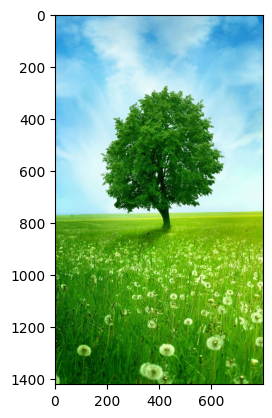

In [ ]:
plt.imshow(img2)

In [ ]:
n = img2.shape[0]*img2.shape[1] #len x breadth
n

1137600

In [ ]:
# flattening an image
all_pixels = img2.reshape((n, 3)) #n rows with rbg combination i.e 3 columns
all_pixels.shape

(1137600, 3)

In [ ]:
model  = KMeans(n_clusters = 5) #5 dominant colors will be the centre for the clusters
model.fit(all_pixels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
centers = model.cluster_centers_.astype('uint8')
centers

array([[193, 236, 243],
       [ 92, 161,  19],
       [ 25,  95,   6],
       [116, 194, 231],
       [159, 213,  83]], dtype=uint8)

In [ ]:
new = np.zeros((n, 3), dtype='uint8') # blank flattened image with zeroes

new.shape

(1137600, 3)

In [ ]:
for i in range(n): #iteration for each pixel
    group_idx = model.labels_[i] #get group/cluster of 1st pixel for eg
    new[i] = centers[group_idx] #store the centre of its cluster in the newimage

In [ ]:
new = new.reshape(*img2.shape)

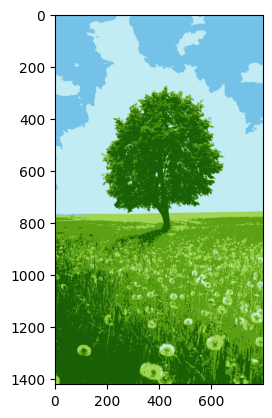

In [ ]:
plt.imshow(new) #using only 3 colors which were dominant
plt.show()